# Objective: Exploratory Data Analysis of Haberman's Cancer Survival Dataset to find the important features that can help in Classifying the data


## 1. Dataset description:

1.<b>Title:</b> Haberman's Survival Data

2.<b>About Data:</b> The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

3.<b>Number of Instances:</b> 306

4.<b>Number of Attributes:</b> 4 (including the class attribute)

5.<b>Attribute Information:</b>

a.Age of patient at time of operation (numerical)

b.Patient's year of operation (year - 1900, numerical)

c.Number of positive axillary nodes detected (numerical)

d.Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

6.Missing Attribute Values: None




## 2.Import necessay libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 3.Load Dataset using pandas

In [2]:
data=pd.read_csv('haberman.csv',header=None)
data.head(5)

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
data.tail()

,0,1,2,3
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [4]:
#Add required column name
data.columns=['Age','Op_Year','axil_nodes','Surv_status']
data.head(2)

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1


## 4.Data Statistics:

In [5]:
#Determine the shape of dataset
data.shape

(306, 4)

In [6]:
#Determine the statistics about data
data.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
#Determine the information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age            306 non-null int64
Op_Year        306 non-null int64
axil_nodes     306 non-null int64
Surv_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


<b>Observations:</b>

    1.There are no missing value in dataset.
    2.All the attributes are of integer type.
    3.Data type of Surv_status is integer it has to be converted into categorical type.The value 1 means the patient has survived 5 years or longer can be mapped to yes and the value 2 means the patient died within 5 years can be mapped as no.
    
    
    
    

## 5.Data Prepration:

In [8]:
data['Surv_status'] = data['Surv_status'].map({1:'Yes', 2:'No'})
data.head() 

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [9]:
#Count total number of Surv_status categories
data['Surv_status'].value_counts()


Yes    225
No      81
Name: Surv_status, dtype: int64

<b>Observations:</b>
    
    1.Number of patient that  has survived 5 years or longer is 225.
    2.Number of patient that died within 5 year is 81.
    3.This dataset is imbalanced.

## 6.Some more insights about data

In [10]:
survived=data[data["Surv_status"]=="Yes"]
print(survived.describe())

              Age     Op_Year  axil_nodes
count  225.000000  225.000000  225.000000
mean    52.017778   62.862222    2.791111
std     11.012154    3.222915    5.870318
min     30.000000   58.000000    0.000000
25%     43.000000   60.000000    0.000000
50%     52.000000   63.000000    0.000000
75%     60.000000   66.000000    3.000000
max     77.000000   69.000000   46.000000


In [11]:
not_survived = data[data['Surv_status']=='No']
not_survived.describe()

,Age,Op_Year,axil_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


<b>Observations:</b>
    
    1.The total Number of patients that survived is 225 and that did not survive is 81.
    2.The axil_nodes of patients who survived are less when compared to patients who did not survive.
    3.The min age of Patient that survived is 30 and that did not survive is 34.
    4.The max age of Patient that survived is 77 and that did not survive is 83.

## 7.Univariate analysis:

The Purpose of univariate analysis is to describe the data,summarize that data and find pattern in that data. The analysis of univariate data involves only one variable. 


### 7.1 Probability Density Function:

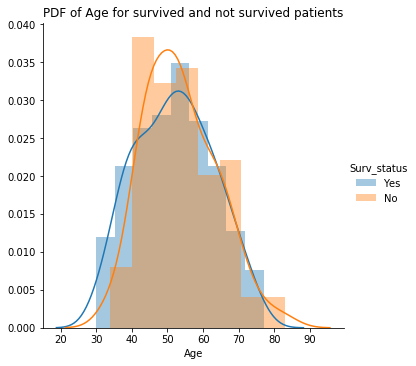

In [12]:
sns.FacetGrid(data,hue='Surv_status',height = 5)\
 .map(sns.distplot,'Age')\
 . add_legend();
plt.title("PDF of Age for survived and not survived patients")
plt.show()

<b>Observation:</b>
    
    1.We can see this major overlap between surv_status we cann't say the status of survival of a patient by age.
    2.But, we can say that patients of age between 30-35 have higher chance to survive and the patients of age 78 have minimal chance to survive and the patients of age between 52–58 have equal chances of surviving and not surviving.
    

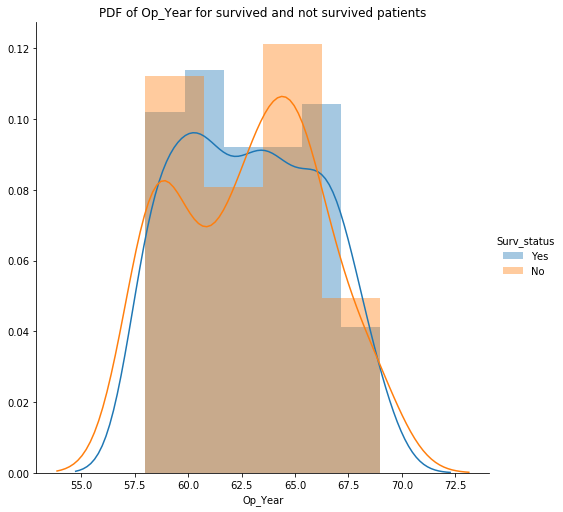

In [13]:
sns.FacetGrid(data,hue='Surv_status',height = 7)\
 .map(sns.distplot,'Op_Year')\
 .add_legend()
plt.title("PDF of Op_Year for survived and not survived patients")
plt.show()

<b>Observations:</b>
    
    1.We can see this major overlap thats why we cann't tell about the survival status by observing only op_year attribute.
    

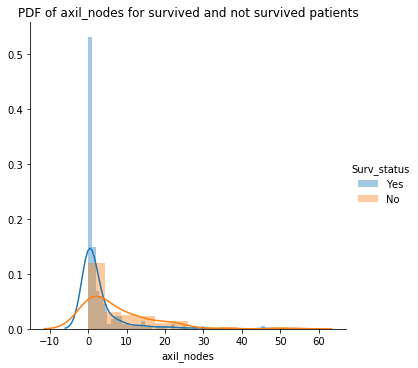

In [14]:
sns.FacetGrid(data,hue='Surv_status',height = 5)\
 .map(sns.distplot,'axil_nodes')\
 .add_legend()
plt.title("PDF of axil_nodes for survived and not survived patients")
plt.show()

<b>Observations:</b>

    1.Patients with no axil_nodes or 1 axil_nodes have more chance to survive. There are very few chances of surviving if there are 25 or more nodes.

### 7.2 Cumulative Distribution Function(CDF):

In [15]:
data_y=data[data["Surv_status"]=="Yes"]
data_n=data[data["Surv_status"]=="No"]

In [16]:
data_n.head()

,Age,Op_Year,axil_nodes,Surv_status
7,34,59,0,No
8,34,66,9,No
24,38,69,21,No
34,39,66,0,No
43,41,60,23,No


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]


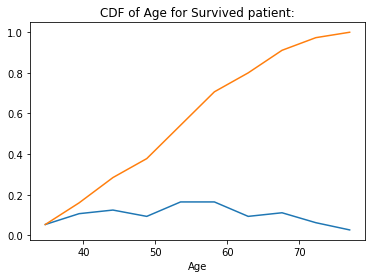

******************************************************
[0.85371981 0.08173913 0.02270531 0.02724638 0.01816425 0.00454106
 0.00908213 0.         0.         0.00454106]


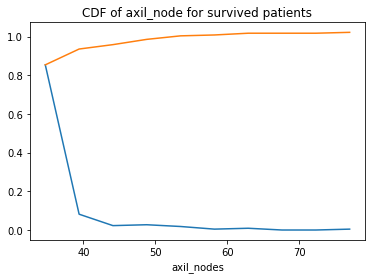

******************************************************
[0.79757576 0.45575758 0.43676768 0.30383838 0.41777778 0.43676768
 0.28484848 0.41777778 0.39878788 0.32282828]


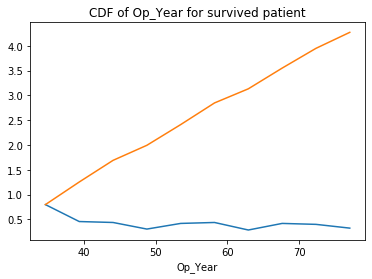

In [17]:
#CDF'S for survived patients
counts,bin_edges=np.histogram(data_y['Age'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
plt.title("CDF of Age for Survived patient:")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Age")
plt.show()
print("******************************************************")
counts1,bin_edges1=np.histogram(data_y['axil_nodes'],bins=10,density=True)
pdf=counts1/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
plt.title("CDF of axil_node for survived patients")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("axil_nodes")
plt.show()
print("******************************************************")
counts2,bin_edges3=np.histogram(data_y['Op_Year'],bins=10,density=True)
pdf=counts2/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
plt.title("CDF of Op_Year for survived patient" )
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Op_Year")
plt.show()

<b>Observations:</b>
    
    1.85% of the patients who have survived had age less than 70.
    2.Minimum age of survived patients is less than 35.
   

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]


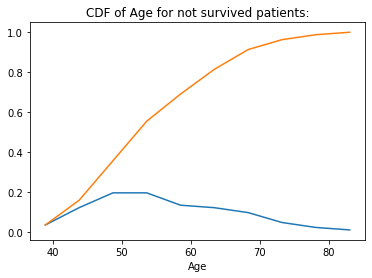

******************************************************
[0.5351377  0.13960114 0.12796771 0.04653371 0.06980057 0.
 0.01163343 0.         0.         0.01163343]


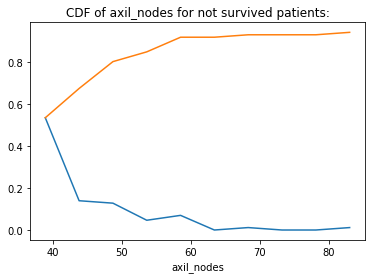

******************************************************
[1.15488215 0.21997755 0.16498316 0.38496072 0.43995511 0.43995511
 0.71492705 0.32996633 0.21997755 0.38496072]


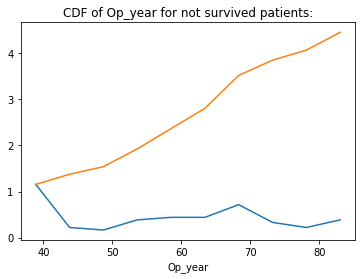

In [18]:
#CDF'S for not survived patients
counts,bin_edges=np.histogram(data_n['Age'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
plt.title("CDF of Age for not survived patients:")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Age")
plt.show()
print("******************************************************")
counts1,bin_edges1=np.histogram(data_n['axil_nodes'],bins=10,density=True)
pdf=counts1/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
plt.title("CDF of axil_nodes for not survived patients:")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("axil_nodes")
plt.show()
print("******************************************************")
counts2,bin_edges3=np.histogram(data_n['Op_Year'],bins=10,density=True)
pdf=counts2/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
plt.title("CDF of Op_year for not survived patients:")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Op_year")
plt.show()

<b>Observations:</b>
    
    1.90% people who have not survived had age 80 or more than 80.
    2.50% people who have not survived had axil_node 40.
    3.It seems that op_year is not an important feature for predicting survived or not survived.
    

### 7.3 Box plot and Whiskers:

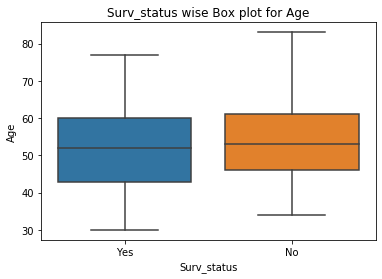

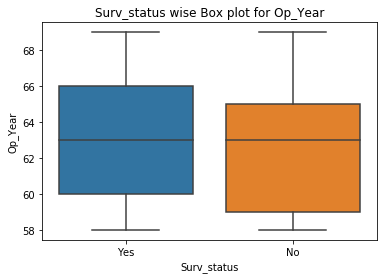

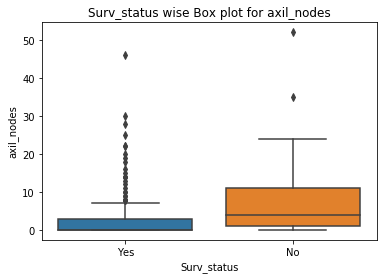

In [19]:
sns.boxplot(x='Surv_status',y='Age',data=data)
plt.title("Surv_status wise Box plot for Age")
plt.show()
sns.boxplot(x='Surv_status',y='Op_Year',data=data)
plt.title("Surv_status wise Box plot for Op_Year")
plt.show()
sns.boxplot(x='Surv_status',y='axil_nodes',data=data)
plt.title("Surv_status wise Box plot for axil_nodes")

plt.show()


<b>Observations:</b>
    
    1.Patients survived having age less than 35 years.
    2.Patients did not survive  having greater than 1 axil_nodes

### 7.4 Violin plots:

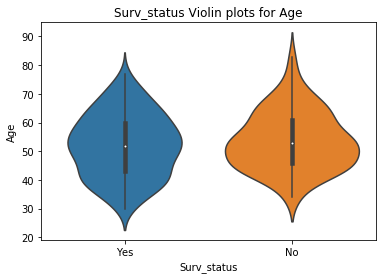

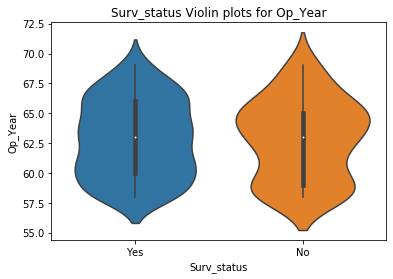

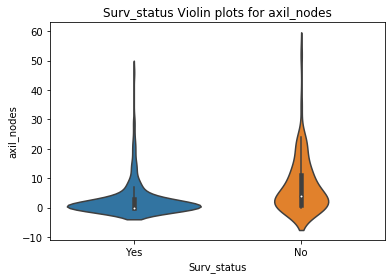

In [20]:
sns.violinplot(x='Surv_status',y='Age',data = data,height = 10)
plt.title("Surv_status Violin plots for Age")
plt.show()
sns.violinplot(x='Surv_status',y='Op_Year',data = data,height = 10)
plt.title("Surv_status Violin plots for Op_Year")
plt.show()
sns.violinplot(x='Surv_status',y='axil_nodes',data = data,height = 10)
plt.title("Surv_status Violin plots for axil_nodes")
plt.show()

<b>Observations:</b>

    1.Most patients survived have age in range almost 50 to 60 years.
    2.Patients who has axil_nodes more than 1 has less chance to survive.

## 8.Bi-variate analysis:

### 8.1 Scatter Plots:

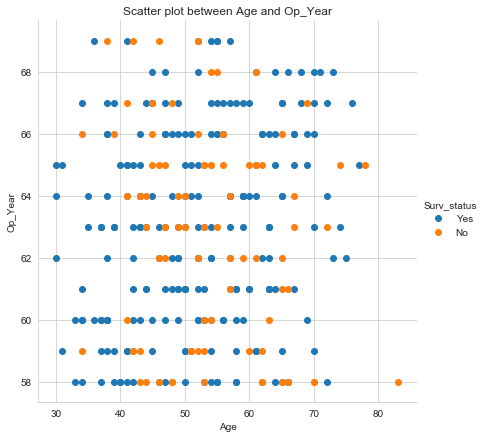

In [26]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue = 'Surv_status' , height = 6)\
 .map(plt.scatter,'Age','Op_Year')\
 .add_legend()
plt.title("Scatter plot between Age and Op_Year")
plt.show()

### 8.2 Pair Plots

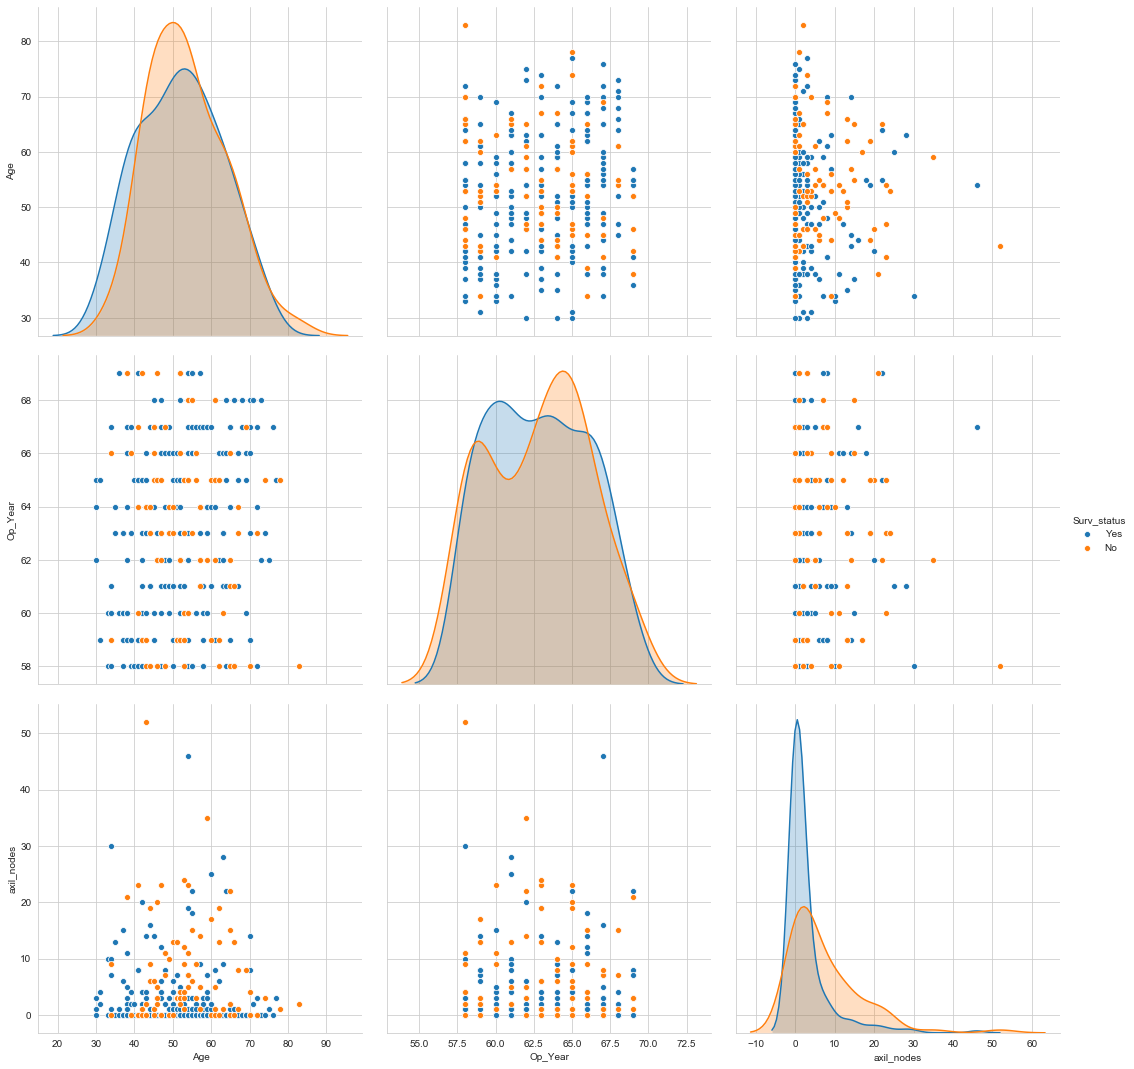

In [22]:
sns.set_style('whitegrid')
sns.pairplot(data, hue='Surv_status', height = 5)
plt.title("Pair plot between attributes")
plt.show()

## 9.Multivariate analysis:

### 9.1 Contour Plot

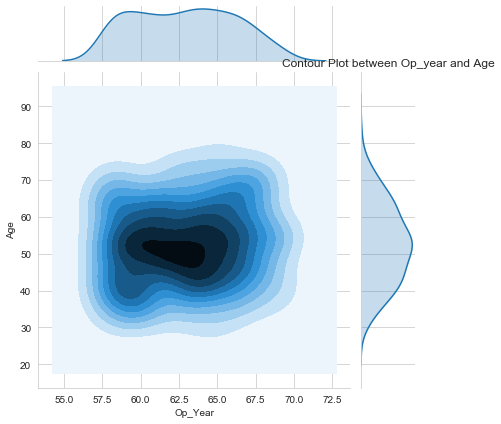

In [23]:
sns.jointplot(x = 'Op_Year', y = 'Age', data = data, kind = 'kde')
plt.title("Contour Plot between Op_year and Age")
plt.show()

<b>Observations:</b>
    
    1.All operation which is held in the year 1960 to 1965 having age 45 to 55 years. 


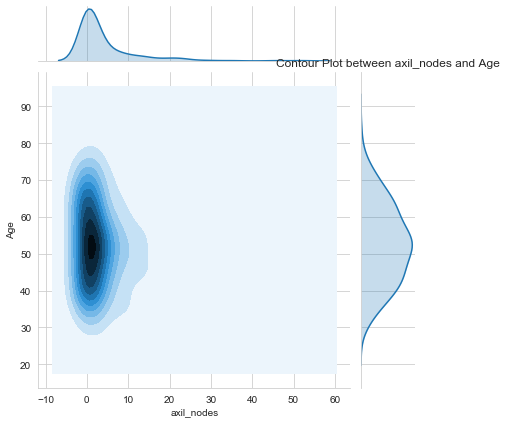

In [25]:
sns.jointplot(x = 'axil_nodes', y = 'Age', data = data, kind = 'kde')
plt.title("Contour Plot between axil_nodes and Age")
plt.show()

<b>Observations:</b>
    
    1.The Patients who has age between 49 to 55 years have required less than 1 axil_nodes.

<b>Conclusions:</b>
    
    1.Patients survived having age less than 35 years.
    2.Patients did not survive  having greater than 1 axil_nodes.
    3.90% people who have not survived had age 80 or more than 80.
    4.Age and axil_nodes are important features for predicting survived and not survived.
    5.It seems that op_year is not an important feature for predicting survived or not survived.

    